# Guía de Laboratorio - CNN y Autoencoder

## Objetivos

Los objetivos de esta guía de laboratorio son los siguientes:
* Familiarizar a los estudiantes con el entorno de desarrollo de Jupyter Notebook.
* Comprender las bases de la inteligencia artificial.
* Comprender las bases y la creacion de las redes neuronales convolucionales.
* Entender la creación del autoencoder.

Debido a la naturaleza de jupyter notebook el papel de "ejercicio" lo cumplen las múltiples celdas de codigo presentes en esta guía de laboratorio, las cuales los estudiantes pueden modificar a su gusto e incluso romper la ejecución natural de este, por ese motivo se recomienda visualizar el funcionamiento base de todo antes de comenzar con la modificación de parámetros.

## Bases para Jupyter Notebook

Las notebook son documentos creados con celdas, en algunas de ellas puedes escribir texto usando __markdown__ y en otras puedes ejecutar código en python.

Puedes ejecutar una celda usando `Shift + Enter` o dando al boton `▶ Run`.

Hay dos tipos de celda:
 - _`Markdown Cell`_: Son las celdas donde puedes escribir texto e incluso adjuntar imágenes, también aceptan LaTeX para la escritura de formulas. 
 
 $$a_{n} = 2^{(4-n)}$$
 
 
 $$\lim_{n\to\infty}a_n = L$$

  
      Para ver como hacer esto puedes dar doble click a esta celda para ver su estructura.
      
  - _`Code Cell`_: Son las celdas donde puedes ejecutar codigo en python, el orden de ejecución aparece al lado izquierdo de la celda marcado con <kbd>In [#]</kbd>, en caso de tener algún tipo de salida esta aparecerá debajo de la celda y marcada al lado izquierdo con <kbd>Out [#]</kbd>.

In [11]:
2/3

0.6666666666666666

Hay que tener en cuenta que no es necesario colocar `print()` ya que jupyter notebook ya asume que queremos ver el resultado de operaciones directas o variables

In [13]:
a = 37
a, a + 3, a*958394934

(37, 40, 35460612558)

### Modos

En jupyter notebook hay dos modos, `Edit Mode` y `Command Mode`.

- `Edit Mode`: Te permite editar las celdas, para editar una celda puedes dar doble click si es una _markdown cell_ o darle al `Enter`, la celda tendrá un borde verde en este modo.
- `Command Mode`: Te permite editar la estructura general de la notebook.

### Comandos

Comandos importantes a tener en cuenta para un correcto uso de las notebook:

- `Shift + Enter`: Ejecutar las celdas seleccionadas y seleccionar la siguiente.
- `Ctrl + Enter`: Ejecutar las celdas seleccionadas.
- `Shift + Tab`: Ver información de una función.
- `D+D`: En _command mode_, eliminar las celdas seleccionadas.
- `0+0`: Reiniciar el kernel para ejecutar todo de nuevo.
- `A`: En _command mode_, crea una celda arriba de la seleccionada
- `B`: En _command mode_, crea una celda debajo de la seleccionada
- `M`: En _command mode_, convierte la celda seleccionada en una _markdown cell_
- `Y`: En _command mode_, convierte la celda seleccionada en una _code cell_

Para ver más comandos es recomendado ver la sección <kbd>Help > Edit Keyboard Shortcuts</kbd> y agregar uno para el <kbd>Run All Cells Above</kbd>

## Imports Necesarios

Imports necesarios para la guía de laboratorio

In [20]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl,numpy as np,matplotlib.pyplot as plt
import fastcore.all as fc
import pandas as pd
from collections.abc import Mapping
from pathlib import Path
from operator import attrgetter,itemgetter
from functools import partial
from __future__ import annotations
from itertools import zip_longest

from torch import tensor,nn,optim
from torch.utils.data import DataLoader,default_collate, SequentialSampler, RandomSampler, BatchSampler
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from datasets import load_dataset,load_dataset_builder

from fastprogress import progress_bar,master_bar
from typing import Mapping
from fastcore.test import test_close

In [21]:
import logging
logging.disable(logging.WARNING)

## Bases

### Tensores

In [24]:
from torch import tensor

En matemáticas los tensores son una generalización de escalares, vectores y matrices, los tensores se pueden clasificar segun su rango, teniendo n-rangos.

Ejemplo de un tensor de rango 0 o simplemente un escalar.

In [27]:
a = torch.tensor(14029309)
a

tensor(14029309)

In [28]:
a = 9902320
b = torch.tensor(a)
b

tensor(9902320)

Ejemplo de un tensor de rango 1 o vector.

In [30]:
a = [3,2.1,42,13]
b = torch.tensor(a)
b

tensor([ 3.0000,  2.1000, 42.0000, 13.0000])

Ejemplo de un tensor de rango 2 o matriz.

In [32]:
a = [[4,3,1], [4,4,1]]
a = torch.tensor(a)
a

tensor([[4, 3, 1],
        [4, 4, 1]])

Podemos crear tensores de diferentes formas y tamaños.

In [34]:
shape = (2,3)
a = torch.rand(shape)
a

tensor([[0.1285, 0.6291, 0.5716],
        [0.6030, 0.3901, 0.9650]])

Tensor de rango 3

In [36]:
shape = (5,3,4)
a = torch.rand(shape)
a

tensor([[[0.4493, 0.0734, 0.4009, 0.5304],
         [0.1788, 0.8315, 0.2731, 0.8790],
         [0.7296, 0.4188, 0.7903, 0.9022]],

        [[0.8894, 0.0755, 0.5262, 0.6048],
         [0.4797, 0.6211, 0.2939, 0.7071],
         [0.6548, 0.9709, 0.0704, 0.5537]],

        [[0.4484, 0.6457, 0.6047, 0.7035],
         [0.7989, 0.8245, 0.6689, 0.5128],
         [0.7572, 0.2100, 0.7431, 0.0439]],

        [[0.4857, 0.0781, 0.1138, 0.4328],
         [0.4432, 0.3210, 0.0761, 0.4074],
         [0.3467, 0.0521, 0.2013, 0.5384]],

        [[0.0868, 0.0313, 0.5759, 0.1467],
         [0.7837, 0.4743, 0.1285, 0.4539],
         [0.9609, 0.0713, 0.3028, 0.5968]]])

Tensor de rango 4

In [38]:
shape = (5,3,4,2)
a = torch.rand(shape)
a

tensor([[[[0.8502, 0.5302],
          [0.0019, 0.3564],
          [0.0306, 0.0144],
          [0.3462, 0.9917]],

         [[0.4852, 0.3828],
          [0.4704, 0.1050],
          [0.8343, 0.5196],
          [0.7110, 0.2242]],

         [[0.9757, 0.8111],
          [0.9208, 0.3595],
          [0.0898, 0.0265],
          [0.9561, 0.4828]]],


        [[[0.7073, 0.4636],
          [0.2527, 0.7594],
          [0.6644, 0.2373],
          [0.8782, 0.4773]],

         [[0.2802, 0.8531],
          [0.7375, 0.0937],
          [0.9830, 0.7051],
          [0.7687, 0.6651]],

         [[0.4721, 0.5381],
          [0.8133, 0.5257],
          [0.7631, 0.7217],
          [0.1631, 0.8457]]],


        [[[0.4302, 0.6345],
          [0.0991, 0.9914],
          [0.2819, 0.2162],
          [0.7482, 0.5843]],

         [[0.6058, 0.6808],
          [0.9062, 0.4537],
          [0.0944, 0.3366],
          [0.4408, 0.8992]],

         [[0.0131, 0.0738],
          [0.8156, 0.7340],
          [0.1207, 0.3895],


Suma de tensores con escalares

In [40]:
a = torch.rand(2)
a, a + 1

(tensor([0.3467, 0.8244]), tensor([1.3467, 1.8244]))

Multiplicación de tensores por escalar

In [42]:
a = torch.ones(3)
a, a * 2, a * 45

(tensor([1., 1., 1.]), tensor([2., 2., 2.]), tensor([45., 45., 45.]))

Internamente cuando multiplicas un tensor de X dimensión por un escalar se usa algo llamado __Broadcasting__

### Broadcasting 

Internamente para las operaciones de multiplicaciones entre tensores y por consiguiente optimizar procesos como la multiplicación de matrices se usa algo conocido como __broadcasting__, inicialmente es un concepto procedente de un lenguaje de programación conocido como [APL](https://tryapl.org/) donde se podia para las operaciones como la de un tensor por un escalar.

In [46]:
a = torch.ones(5)
a + 1, a * 3, a > 0

(tensor([2., 2., 2., 2., 2.]),
 tensor([3., 3., 3., 3., 3.]),
 tensor([True, True, True, True, True]))

Sin embargo la idea del broadcasting no se quedó ahí, gracias a otro lenguaje de programación algo desconocido llamado [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html) se implemento una forma de realizar broadcasting con tensores de rango superior y no solo escalares.

De esta manera podemos hacer cosas como un broadcast de una matriz con un vector

In [48]:
matrix = torch.ones(3,3);matrix

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [49]:
vector = torch.rand(3);vector

tensor([0.0935, 0.8740, 0.9046])

In [50]:
matrix + vector, matrix * vector, matrix / vector

(tensor([[1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046]]),
 tensor([[0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046]]),
 tensor([[10.6975,  1.1441,  1.1055],
         [10.6975,  1.1441,  1.1055],
         [10.6975,  1.1441,  1.1055]]))

Los tensores también nos permiten agregar ejes colocando `[:]` que sigifica que tomamos todo de ese eje y `[None]` para agregar un eje más.

In [52]:
vector.shape, vector[None,:,None,None].shape, vector[None,:,None,None]

(torch.Size([3]),
 torch.Size([1, 3, 1, 1]),
 tensor([[[[0.0935]],
 
          [[0.8740]],
 
          [[0.9046]]]]))

De esta manera podemos hacer el broadcasting con un "vector vertical" y hacerlo en las columnas en vez de las filas

In [54]:
vertical_vector = vector[:,None]; vertical_vector

tensor([[0.0935],
        [0.8740],
        [0.9046]])

In [55]:
matrix + vertical_vector, matrix * vertical_vector, matrix / vertical_vector

(tensor([[1.0935, 1.0935, 1.0935],
         [1.8740, 1.8740, 1.8740],
         [1.9046, 1.9046, 1.9046]]),
 tensor([[0.0935, 0.0935, 0.0935],
         [0.8740, 0.8740, 0.8740],
         [0.9046, 0.9046, 0.9046]]),
 tensor([[10.6975, 10.6975, 10.6975],
         [ 1.1441,  1.1441,  1.1441],
         [ 1.1055,  1.1055,  1.1055]]))

La matriz no necesariamente tiene que ser cuadrada

In [57]:
matrix = torch.ones(10,3); matrix

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [58]:
matrix * vector, matrix + vector

(tensor([[0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046],
         [0.0935, 0.8740, 0.9046]]),
 tensor([[1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046],
         [1.0935, 1.8740, 1.9046]]))

Pero si lo hacemos con el "vector vertical" no podremos.

In [60]:
matrix * vertical_vector

RuntimeError: The size of tensor a (10) must match the size of tensor b (3) at non-singleton dimension 0

Esto es debido a que el broadcasting tiene normas y no se puede usar con cualquier tamaño o rango de tensor, debido a que internamente lo que está haciendo es expandir los valores al tamaño necesario, no ocupa memoria ya que usa un truco a la hora de leer en memoria.

 - La dimension debe tener el mismo tamaño o ser 1
 - Numpy/Pytorch empieza a verificar los tamaños de derecha a izquierda
 
Por ejemplo si tenemos algo como una imagen de 256x256x3 por los 3 canales RGB, podemos hacer algo así
        
        Imagen      (256 x 256 x 3)
        Escalar                  3
        Resultado   (256 x 256 x 3)

In [62]:
a = torch.rand(256,256,3)
b = torch.ones(3)
(a*b).shape

torch.Size([256, 256, 3])

In [63]:
a = torch.ones(9,9,5,5)
b = torch.rand(9,1,5,5)
(a*b).shape

torch.Size([9, 9, 5, 5])

In [64]:
a = torch.ones(10,40,2,54)
b = torch.ones(10,39,2,54)
a*b

RuntimeError: The size of tensor a (40) must match the size of tensor b (39) at non-singleton dimension 1

### Multiplicación de Matrices

Internamente toda inteligencia artficial que use redes neuronales utilizan como base la multiplicación de matrices, por ejemplo esta red neuronal convolucional en excel.

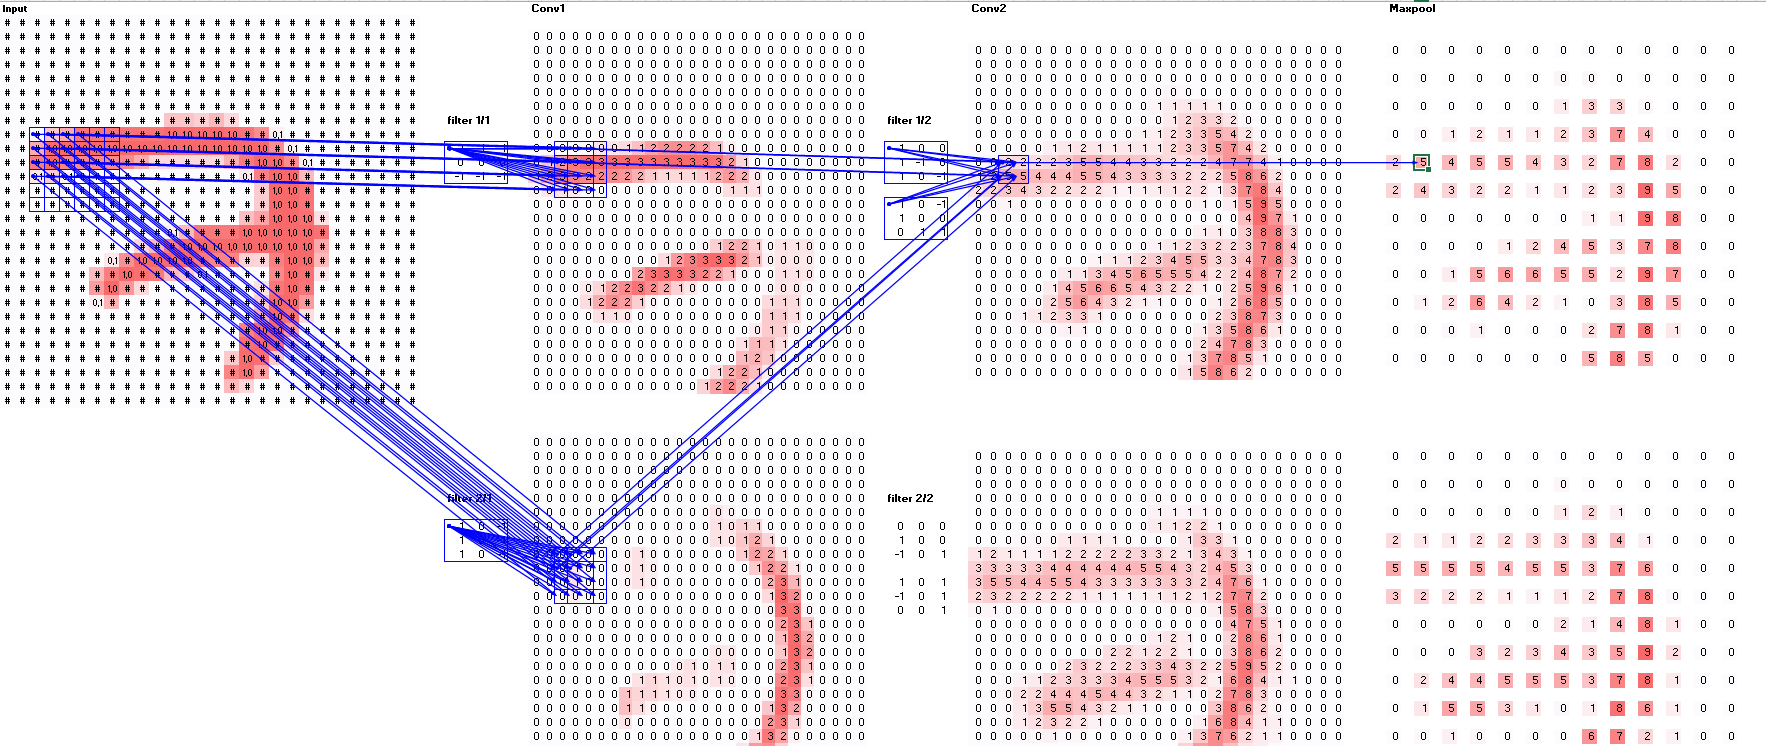

Por este motivo es importante recordar la multiplicación de matrices.

 $$ \begin{bmatrix}
         a_{11} & a_{12} & \cdots & a_{1n}\\
         a_{21} & a_{22} & \cdots & a_{2n}\\
         \vdots & \vdots & \ddots & \vdots\\
         a_{m1} & a_{m2} & \cdots & a_{mn}\\ 
     \end{bmatrix}
     \times
     \begin{bmatrix}
         b_{11} & b_{12} & \cdots & b_{1p}\\
         b_{21} & b_{22} & \cdots & b_{2p}\\
         \vdots & \vdots & \ddots & \vdots\\
         b_{n1} & b_{n2} & \cdots & b_{np}\\
     \end{bmatrix}
      =
     \begin{bmatrix}
         c_{11} & c_{12} & \cdots & c_{1p}\\
         c_{21} & c_{22} & \cdots & c_{2p}\\
         \vdots & \vdots & \ddots & \vdots\\
         c_{m1} & c_{m2} & \cdots & c_{mp}\\
     \end{bmatrix}\\
  c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} + b_{nj} = \sum_{k=1}^n a_{ik}b_{kj}  $$

Con _broadcasting_

In [69]:
a = torch.rand(5,10)
b = torch.rand(10,6)

In [70]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i]   = (a[i,:,None] * b).sum(dim=0) 
    return c

In [71]:
c = matmul(a,b)
c.shape

torch.Size([5, 6])

Además de cosas como el broadcasting también se hace uso de algo llamado __Einstein Summation__ que es una forma compacta de representar la combinación de productos y sumas, lo que hay que tener en cuenta para usarlo es lo siguiente: 

- Letras repetidas en la cadena de entrada signfica que los valores en esos ejes se van a multiplicar juntos
- Ignorar una letra en l cadena de salida signfica que los valores en ese eje se van a sumar

In [73]:
a = torch.rand(4,3)
b = torch.rand(3,5)
a.shape, b.shape

(torch.Size([4, 3]), torch.Size([3, 5]))

$$a[i,j]$$  $$b[j,k]$$

Entonces $$c[i, k] = (a[i,1] * b[1,k] + a[i,2] * b[2,k] + ... + a[i,j] * b[j,k])$$

La matriz ___c[i, k]___ también lo podemos conseguir de la siguiente manera

$$c[i, k] = (a[i,:] * b[:,k]).sum()$$

Porque recuerda que `[:]` significa que tomas todos los valores de ese eje y la multiplicacion de matrices es el producto punto de esos dos vectores 
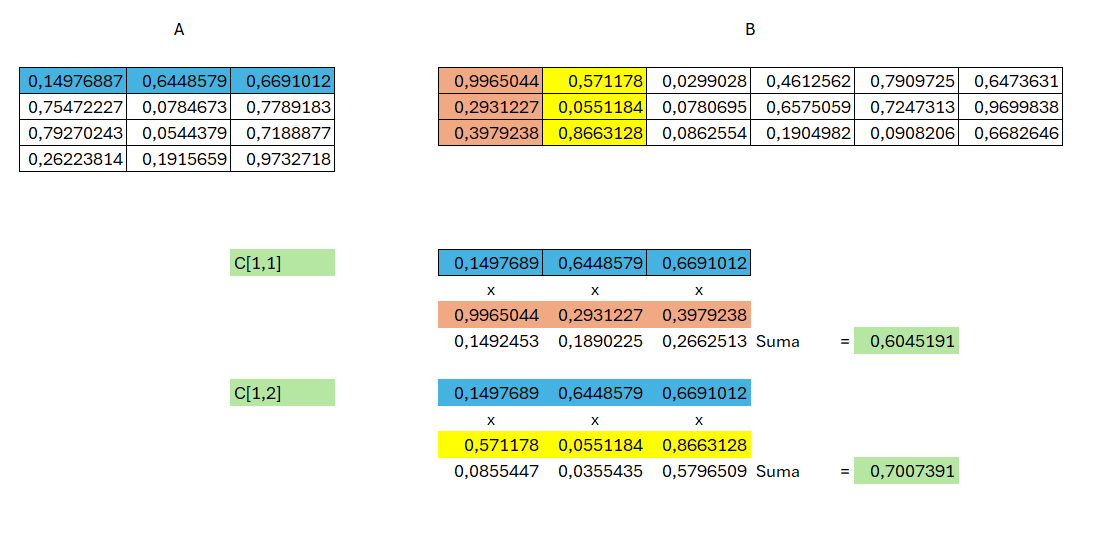
Y así con todo lo demás.

Ahora con __`Einsum`__

In [75]:
c = torch.einsum('ij,jk->ik', a,b)
c, c.shape

(tensor([[0.6477, 0.3758, 0.1451, 0.1230, 0.6175],
         [0.8164, 0.4795, 0.1878, 0.1956, 0.7717],
         [1.7329, 0.9399, 0.4192, 0.6050, 1.4815],
         [1.4103, 0.9559, 0.3424, 0.4683, 1.4412]]),
 torch.Size([4, 5]))

Pytorch ya tiene su propia implementación de la multiplicación de matrices y se hace con `@`

In [77]:
a@b,(a@b).shape

(tensor([[0.6477, 0.3758, 0.1451, 0.1230, 0.6175],
         [0.8164, 0.4795, 0.1878, 0.1956, 0.7717],
         [1.7329, 0.9399, 0.4192, 0.6050, 1.4815],
         [1.4103, 0.9559, 0.3424, 0.4683, 1.4412]]),
 torch.Size([4, 5]))

### Red Neuronal

Una red neuronal es un conjunto de nodos o neuronas separadas en capas y conectadas entre si, cada neurona tiene una serie de valores de entrada, un peso asignado a cada valor y una o multiples salidas.

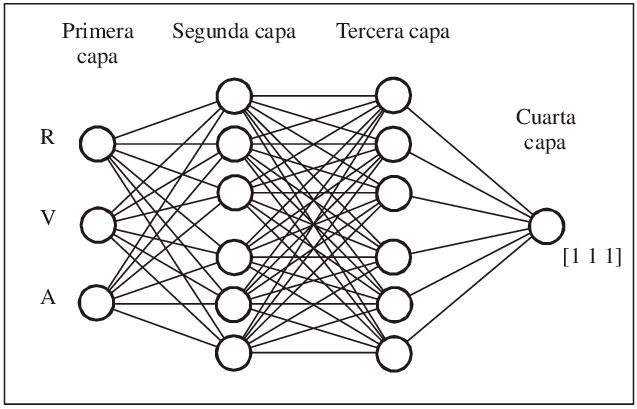

Cuando se entrena una red neuronal lo que se hace es actualizar los pesos de cada capa haciendo uso de multiples tecnicas, una de las más comunes es el _Stochastic Gradient Descent_.

### Modelo

Un modelo en inteligencia artificial es una estructura que agrupa al algoritmo de inteligencia artificial como tal, en este caso las diferentes redes neuronales, estas se entrenan posteriormente en base a un conjunto de datos.

### _Learning Rate_

En inteligencia artificial existe un concepto y parámetro general llamado _learning rate_, dicta que tanto van a cambiar los pesos dentro de la cada capa de la red neuronal.

Encontrar un _learning rate_ adecuado para un modelo es una tarea compleja debido a que si este es muy pequeño se tiene un aprendizaje mermado y que posiblemente se quede estancado, por lo contrario si se usa un _learning rate_ elevado el entrenamiento será descontrolado y erróneo, una recomendación general es usar valores dentro del rango __(0.0, 0.5]__.

### Derivadas y Regla de la cadena

Otra base para crear una IA con redes neuronales son las derivadas y la regla de la cadena

Para empezar una capa de una red neuronal se toma como la función ___f(x)___ y cuando vamos a realizar una actualización de la matriz de los pesos se debe realizar la derivada de esa función ___f'(x)___, debido a que por lo general los modelos de inteligencia artificial se componen de redes neuronales con multiples capas llegara el punto en el que se tendrá una cadena de funciones

Por ejemplo.

Se tiene una red neuronal de dos capas, la primera ___f(x)___ y la segunda ___g(x)___ debido a que la segunda capa de la red usa los resultados de la primera capa se tiene que el resultado final de la red tiene la forma ___g(f(x))___.
Ya que para realizar una actualización de los pesos dentro de la red se tiene que hacer una derivada para obtener un gradiente y multiplicarlo por un _learning rate_ para actualizar los pesos de cada capa se debe hacer estas derivadas, para ello se hace uso de la regla de la cadena.

Teniendo 
$$ f(x) = y     $$
$$f'(x) = \frac{dy}{dx} $$
$$ g(y) = z  $$
$$ g'(y) = \frac{dz}{dy}$$ 

_z_ e _y_ son variables dependientes de _x_

Para obtener la derivada de _g(y)_ se hace uso de la regla de la cadena que dice:

$$ g'(y) =  \frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx} $$

Afortunadamente pytorch ya hace todo este proceso automaticamente y es llamado __backpropagation__.

### Épocas

Se le llama época a un ciclo de entrenamiento del modelo de inteligencia artificial

### _Loss_

La _loss_ o perdida es un valor que nos dice que tan alejadas las predicciones del modelo con respecto a los datos de entrenamiento, de esta manera podemos medir u observar el ritmo al que está entrenando el modelo.

La perdida se puede calcular de multiples formas, pero la más común en procesamiento de imágenes es usando el _mean shift error_ o _cross entropy_.

In [90]:
F.cross_entropy??

Signature:
F.cross_entropy(
    input: torch.Tensor,
    target: torch.Tensor,
    weight: Optional[torch.Tensor] = None,
    size_average: Optional[bool] = None,
    ignore_index: int = -100,
    reduce: Optional[bool] = None,
    reduction: str = 'mean',
    label_smoothing: float = 0.0,
) -> torch.Tensor
Source:   
def cross_entropy(
    input: Tensor,
    target: Tensor,
    weight: Optional[Tensor] = None,
    size_average: Optional[bool] = None,
    ignore_index: int = -100,
    reduce: Optional[bool] = None,
    reduction: str = "mean",
    label_smoothing: float = 0.0,
) -> Tensor:
    r"""Compute the cross entropy loss between input logits and target.

    See :class:`~torch.nn.CrossEntropyLoss` for details.

    Args:
        input (Tensor) : Predicted unnormalized logits;
            see Shape section below for supported shapes.
        target (Tensor) : Ground truth class indices or class probabilities;
            see Shape section below for supported shapes.
        weigh

In [91]:
F.mse_loss??

Signature:
F.mse_loss(
    input: torch.Tensor,
    target: torch.Tensor,
    size_average: Optional[bool] = None,
    reduce: Optional[bool] = None,
    reduction: str = 'mean',
) -> torch.Tensor
Source:   
def mse_loss(
    input: Tensor,
    target: Tensor,
    size_average: Optional[bool] = None,
    reduce: Optional[bool] = None,
    reduction: str = "mean",
) -> Tensor:  # noqa: D400,D402
    r"""mse_loss(input, target, size_average=None, reduce=None, reduction='mean') -> Tensor

    Measures the element-wise mean squared error.
    See :class:`~torch.nn.MSELoss` for details.
    """
    if has_torch_function_variadic(input, target):
        return handle_torch_function(
            mse_loss, (input, target), input, target, size_average=size_average, reduce=reduce, reduction=reduction
        )
    if not (target.size() == input.size()):
        warnings.warn(
            f"Using a target size ({target.size()}) that is different to the input size ({input.size()}). "
            "

### Conjunto de Entrenamiento y Validación

Para entrenar un modelo se necesitan un conjunto de datos de entrenamiento y un conjunto de datos de validación, cuando un modelo se está entrenando usa datos del conjunto de entrenamiento y compara los valores con el conjunto de validación, un modelo está entrenando cuando la perdida disminuye.

Por lo general no se quiere un modelo extremadamente preciso en la fase de entrenamiento debido a que es más probable que este no tenga un buen rendimiento fuera de el, cuando esto ocurre se le llama _overfitting_ y el caso contrario cuando se entrena muy poco _underfitting_, para solucionarlo se debe encontrar un equilibrio entre el numero de epocas y también se puede hacer _data augmentation_ en caso de tener pocos datos de entrenamiento, este consiste en randomizar el orden de los datos de entrenamiento, en imágenes se puede hacer _padding_, eliminar canales de color, distorcionar las imagenes o cortalas, entre otras maneras de aumentar artificialmente los datos de entrenamiento.

### Optimizer, Data Set y Data Loader

El _optimizer_ se encarga de actualizar los pesos de la red neuronal, a este es al que se le pasa el valor del _learning rate_

In [96]:
class Optimizer():
    def __init__(self, params, lr=0.5): 
        self.params = list(params)
        self.lr = lr

    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * self.lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

El Data set es el conjunto de datos, organizado a modo de tuplas `(x , y)`

In [98]:
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    #El __getitem__ es lo que nos da los valores cuando hacemos por ejemplo 
    #Dataset[n:m]
    def __getitem__(self, i): return self.x[i],self.y[i]

Los Dataloaders son los conjuntos de datos con los que trabajará directamente el modelo de inteligencia artificial, estos se encargana de cargar los datos de acuerdo a un _batch size_.

In [100]:
class DataLoaders:
    def __init__(self, *dls): self.train,self.valid = dls[:2]

    @classmethod
    def from_dd(cls, dd, batch_size, as_tuple=True, **kwargs):
        f = collate_dict(dd['train'])
        return cls(*get_dls(*dd.values(), bs=batch_size, collate_fn=f, **kwargs))

Una función `collate` se encarga de convertir un conjunto de datos en otro que nos interesa, en este caso tenemos una función `collate_dict`que se encarga de convertir un diccionario en un DataSet de tuplas de la forma `(x , y)`, con `x` siendo los datos de entrenamiento y `y` las labels.

In [102]:
def collate_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b): return get(default_collate(b))
    return _f

La función `accuracy` o precisión se encarga de hacer una media de las _loss_ de la capa.

In [104]:
def accuracy(out, yb): return (out.argmax(dim=1)==yb).float().mean()

`Report` simplemente se encarga de imprimir en pantalla la precisión.

In [106]:
def report(loss, preds, yb): print(f'{loss:.2f}, {accuracy(preds, yb):.2f}')

### _Forward_ y _Backward_

Dentro de las redes neuronales se hace un proceso llamado _forward pass_ y _backward pass_, el primero de ellos siendo simplemente el paso normal de los valores de una capa de la red neuronal a la otra, dicho de otra forma los datos "avanzan", en este punto no hay demasiadas complicaciones.

Por otra parte el _backward pass_ es el proceso de entrenamiento en sí mismo, en este paso es donde se hace una actualización de los pesos de las capas de la red neuronal, haciendo uso de los valores obtenidos al final del _forward pass_, la _loss_ y los gradientes obtenidos mediante la regla de la cadena o _backpropagation_. 

### Función de Entrenamiento

La función `fit` es la encargada de empezar el entrenamiento de un modelo que le pasamos, internamente es la encargada de todo el proceso y la que realiza el _forward_ y el _backward_.
* `epochs`: Número de epocas que queremos que dure el entrenamiento.
* `model`: Modelo que vamos a entrenar.
* `loss_func`: La función de perdida que queramos usar.
* `train_dl`: _Dataloader_ de entrenamiento.
* `valid_dl`: _Dataloader_ de validación.

In [111]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
        with torch.no_grad():
            tot_loss,tot_acc,count = 0.,0.,0
            for xb,yb in valid_dl:
                pred = model(xb)
                n = len(xb)
                count += n
                tot_loss += loss_func(pred,yb).item()*n
                tot_acc  += accuracy (pred,yb).item()*n
        print(epoch, tot_loss/count, tot_acc/count)
    return tot_loss/count, tot_acc/count

La función `get_dls` se encarga de crear los Data Loaders de los Data Sets que pasamos.

* `train_ds`: Data set de entrenamiento.
* `valid_ds`: Data set de validación.
* `bs`: _Batch size_.
* `**kwargs`: Otros argumentos nombrados, como <kbd>shuffle = False</kbd>.
* `shuffle = True`: Crea data loaders tomando datos aleatorios del data set, 
* `shuffle = False`: Crea los data loaders en orden

Ejemplo para llamar la función:
```
DataLoaders = get_dls(train_ds, valid_ds, 256, shuffle = False, collate_fn = collate_dict)
```

In [113]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

### Funciones de Impresion de Imágenes

Las siguientes 3 celdas solo son funciones para mostrar las imágenes, no es necesario prestarles demasiada atención

In [116]:
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, figsize=None, title=None, noframe=True, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    if fc.hasattrs(im, ('cpu','permute','detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=np.array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    if noframe: ax.axis('off')
    return ax

In [117]:
@fc.delegates(plt.subplots, keep=True)
def subplots(
    nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure
    **kwargs
): # fig and axs
    "A figure and set of subplots to display images of `imsize` inches"
    if figsize is None: figsize=(ncols*imsize, nrows*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None: fig.suptitle(suptitle)
    if nrows*ncols==1: ax = np.array([ax])
    return fig,ax

In [118]:
@fc.delegates(subplots)
def get_grid(
    n:int, # Number of axes
    nrows:int=None, # Number of rows, defaulting to `int(math.sqrt(n))`
    ncols:int=None, # Number of columns, defaulting to `ceil(n/rows)`
    title:str=None, # If passed, title set to the figure
    weight:str='bold', # Title font weight
    size:int=14, # Title font size
    **kwargs,
): # fig and axs
    "Return a grid of `n` axes, `rows` by `cols`"
    if nrows: ncols = ncols or int(np.floor(n/nrows))
    elif ncols: nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    fig,axs = subplots(nrows, ncols, **kwargs)
    for i in range(n, nrows*ncols): axs.flat[i].set_axis_off()
    if title is not None: fig.suptitle(title, weight=weight, size=size)
    return fig,axs

In [119]:
@fc.delegates(subplots)
def show_images(ims:list, # Images to show
                nrows:int|None=None, # Number of rows in grid
                ncols:int|None=None, # Number of columns in grid (auto-calculated if None)
                titles:list|None=None, # Optional list of titles for each image
                **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`"
    axs = get_grid(len(ims), nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip_longest(ims, titles or [], axs): show_image(im, ax=ax, title=t)

Configuración adicional para mostrar las imágenes

In [121]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray'
mpl.rcParams['figure.dpi'] = 70

### Generales

En esta parte solo definimos unas funciones para envíar los datos al dispositivo

* `mps`: Para dispositivos Apple que usen un chip M1 en adelante.
* `cuda`: Para dispositivos que tengan tarjetas gráficas compatibles de NVIDIA
* `cpu`: En caso de no tener alguno de estos dispositivos lo enviamos a la CPU

In [124]:
def_device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

def to_device(x, device=def_device):
    if isinstance(x, torch.Tensor): return x.to(device)
    if isinstance(x, Mapping): return {k:v.to(device) for k,v in x.items()}
    return type(x)(to_device(o, device) for o in x)

def collate_device(b): return to_device(default_collate(b))

## Presentación de los Datos

Se va a tomar los datos de **Fashion Mnist**, es un conjunto de datos que consiste en 60.000 ejemplares de entrenamiento y 10.000 ejemplares de validación, cada ejemplar consiste en una imagen de 28x28 pixeles en escala de grises además de una etiqueta correspondiente.

In [127]:
name = "fashion_mnist"
ds_builder = load_dataset_builder(name, trust_remote_code=True)
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



Con `ds_builder.info.features` se puede ver las caracteríticas de los datos.

In [129]:
ds_builder.info.features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

Con `ds_builder.info.splits` se puede ver como están separados los datos.

In [131]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296607, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5233810, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [132]:
x,y = 'image','label'
dsd = load_dataset(name, trust_remote_code=True)

_Inplace_ es una función que recibe otra función y la retorna.

In [134]:
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

En este punto es donde se hará uso de la función _inplace_

Esta función simplemente se encarga de transformar los datos en tensores

In [136]:
@inplace
def transformi(b): b[x] = [TF.to_tensor(o) for o in b[x]]

Es necesario hacer esto para poder utilizar el `.with_transform` de los datasets de hugging face debido a que estos requieren de un _Callable_ o un objeto que _se pueda llamar_ para funcionar.

In [138]:
batch_size = 256
transformed_dataset = dsd.with_transform(transformi)

In [139]:
transformed_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [140]:
transformed_dataset['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

Aquí podemos ver la primera imagen del Dataset de entrenamiento.

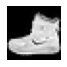

In [142]:
ds = transformed_dataset['train']
img = ds[0]['image']
show_image(img, figsize=(1,1));

In [143]:
collate_function = collate_dict(ds)

Aquí definimos una función para crear los data loaders en nuestro caso

In [145]:
def collate_(b): return to_device(collate_function(b))
def data_loaders(dsd, bs, **kwargs): return {k:DataLoader(v, bs, **kwargs) for k,v in dsd.items()}

In [146]:
dls = data_loaders(transformed_dataset, batch_size, collate_fn = collate_)

In [147]:
dls

{'train': <torch.utils.data.dataloader.DataLoader at 0x20b99027d50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x20b98c80750>}

- `dt`: Data Loader Training
- `dv`: data Loader Validation

In [149]:
dt = dls['train']
dv = dls['test']

In [150]:
x_batch, y_batch = next(iter(dt))

Aquí podemos ver que el `x_batch` consiste de 256 imágenes de 28x28.

In [152]:
x_batch.shape

torch.Size([256, 1, 28, 28])

Y aquí podemos ver que `y_batch` simplemente tiene las 256 etiquetas

In [154]:
y_batch.shape

torch.Size([256])

In [155]:
y_batch[1]

tensor(0, device='cuda:0')

In [156]:
x_batch

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [157]:
y_batch

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
        9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
        9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7,
        7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
        0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0,
        8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4], device='cuda:0')

In [158]:
labels = ds.features[y].names

In [159]:
labels

['T - shirt / top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [160]:
label_getter = itemgetter(*y_batch[:16])
titles = label_getter(labels)

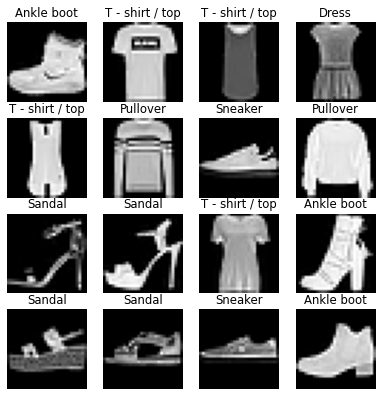

In [161]:
show_images(x_batch[:16], imsize=1.7, titles=titles)

## _Convolutional Neural Network_ (CNN)

Para el desarrollo de la teoría de las CNN se hará uso de los datos de **MNIST**, es una base de datos similar a la de Fashion MNIST y de hecho es en la que esta última se basa.

In [164]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
#El mdkir crea un directorio,] exist_ok=True es para que no de error cuando vea que el directorio ya existe previamente
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [165]:
from urllib.request import urlopen
from shutil import copyfileobj

with urlopen(MNIST_URL) as in_stream, open(path_gz, 'wb') as out_file:
    copyfileobj(in_stream, out_file)
    
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(torch.tensor, [x_train, y_train, x_valid, y_valid])

### Convoluciones

Cuando se hace uso de inteligencia artificial en el procesamiento de imágenes por lo general se quiere priorizar el reconocimiento de patrones y la velocidad de procesamiento, para hacer esto se usa las convoluciones.

Para empezar se tiene un input que puede ser una matriz de 3x3:

<img alt="input" align="center" src = "images/MatrizCNN.png"/>

Luego se tiene algo llamado filtro o kernel de un tamaño inferior, por ejemplo de 2x2:


<img alt="kernel" align="center" src = "images/KernelCNN.png"/>

Luego se multiplica y suma el kernel por un fragmento de la imagen y este se va _deslizando_ para obtener los demás resultados:

<img alt="kernel" align="center" src = "images/AplicarKernel.png"/>

<img alt="kernel" align="center" src = "images/EcuacionKernel.png"/>

De esta manera se obtiene una imagen de menor tamaño, en este caso de 2x2 que debería tener las carácterísticas importantes de la imagen original.

Vamos a tomar una imagen de nuestro _training data_ y una imagen de nuestro _validation data_.

In [169]:
x_imgs = x_train.view(-1,28,28)
xv_imgs = x_valid.view(-1,28,28)

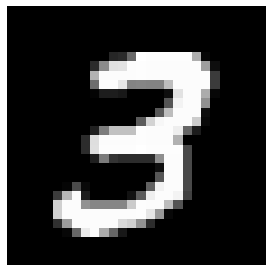

In [170]:
im3 = x_imgs[7]
show_image(im3);

Se crea un kernel de 3x3, en este caso para identificar los "bordes superiores" de una imagen.

In [172]:
top_edge = torch.tensor([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]]).float()

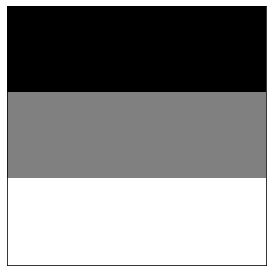

In [173]:
show_image(top_edge, noframe=False);

El kernel es como una pequeña ventana de 3x3 que se va deslizando por nuestra imagen y si se tiene por ejemplo:

$$\begin{matrix} a1 & a2 & a3 \\ a4 & a5 & a6 \\ a7 & a8 & a9 \end{matrix}$$

Dará como resultado: $-a1-a2-a3+a7+a8+a9$.

Aquí estamos viendo la imagen que sacamos de nuestros datos y en especifico estamos mirando las `primeras 13 filas` y las `primeras 23 columnas`

In [176]:
df = pd.DataFrame(im3[:13,:23])
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.17,0.41,1.00,0.99,0.99,0.99,0.99,0.99,0.68,0.02,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.54,0.88,0.88,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.62,0.05
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.23
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.98,0.98,0.90,0.52,0.52,0.52,0.52,0.74,0.98,0.98,0.98,0.98,0.23
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.11,0.11,0.09,0.00,0.00,0.00,0.00,0.05,0.88,0.98,0.98,0.67,0.03


Ahora vamos a aplicar el kernel `top_edge` a una posición que va desde 3 a 6 (sin incluir el 6) y las columnas desde 14 a 17 (sin incluir el 17)

Aquí se obtiene un valor positivo porque "detectó" un borde superior en la imagen.

In [179]:
(im3[3:6,14:17] * top_edge).sum()

tensor(2.97)

Y en este caso un valor negativo porque no es un borde superior.

In [181]:
(im3[7:10,14:17] * top_edge).sum()

tensor(-2.96)

Ahora vamos a definir una función que haga esa multiplicación del kernel por nosotros

In [183]:
def apply_kernel(row, col, kernel): return (im3[row-1:row+2,col-1:col+2] * kernel).sum()

Para usarla le pasamos el centro donde queremos aplicar el kernel, por ejemplo para aplica el que tenemos arriba le pasamos el centro (4,15).

In [185]:
apply_kernel(4,15,top_edge)

tensor(2.97)

Ahora bien, para que el kernel se "deslice" a lo largo de la imagen se puede hacer uso de una _list comprehension_, por ejemplo para una imagen de 5x5:

In [187]:
[[(i,j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

<img alt="kernel" align="center" src = "images/KernelSlide.svg"/>

y aquí podemos aplicarlo con nuestro kernel haciendo uso de la _list comprehension_ y un nuevo rango.

In [190]:
rng = range(1,27)
top_edge3 = torch.tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])
top_edge3

tensor([[ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,
          0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,
          0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,
          0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.15,  0.32,  0.73,  1.57,  2.39,  2.97,  2.96,  2.96,  2.96,
          2.66,  1.69,  0.70,  0.02,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.17,  0.71,  1.59,  2.30,  2.74,  2.86,  2.96,  2.96,  2.95,  2.95,  2.95,
          2.95,  2.59,  1.66,  0.67,  0.05,  0.00,  0.00,  0.

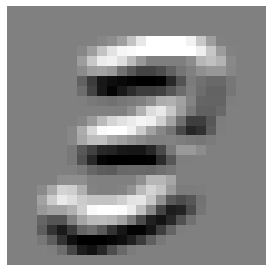

In [191]:
show_image(top_edge3);

Ahora podemos hacer lo mismo con los bordes izquierdos.

In [193]:
left_edge = torch.tensor([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]]).float()

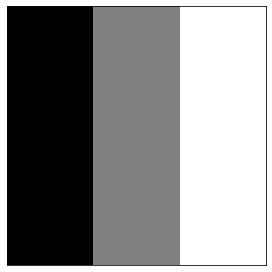

In [194]:
show_image(left_edge, noframe=False);

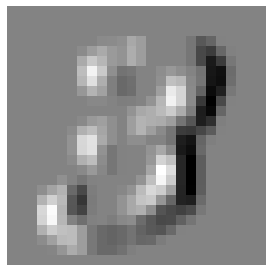

In [195]:
left_edge3 = torch.tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng])
show_image(left_edge3);

Y así estamosreduciendo el tamaño de la imagen y resaltando las características que nos interesan.

In [197]:
top_edge3.shape, left_edge3.shape

(torch.Size([26, 26]), torch.Size([26, 26]))

<img alt="kernel" align="center" src = "images/AplicarKernel2.png"/>

Para más información visitar: [CNNs From Different Viewpoints](https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c).

### Convoluciones en PyTorch

In [201]:
import torch.nn.functional as F
import torch

Para hacer uso de las convoluciones en python se usa un truco llamado [im2col](https://hal.inria.fr/inria-00112631/) creado por Yangqing Jia para convertir una convolución tradicional en una multiplicación de matrices.

<img alt="kernel" align="center" src = "images/ConvMatriz.png"/>

Para más información visitar [Convolution in Caffe: a memo](https://github.com/Yangqing/caffe/wiki/Convolution-in-Caffe:-a-memo) y otra forma de inplementarlo en [Numpy](https://github.com/3outeille/CNNumpy/blob/5394f13e7ed67a808a3e39fd381f168825d65ff5/src/fast/utils.py#L360).

Aquí lo que vamos a hacer es convertir todo el proceso de la convolution en una multiplicación de matrices

In [206]:
im3.shape 

torch.Size([28, 28])

Aquí le agregamos dimensiones a la imagen (_batch y channel dimension_) porque es algo que espera PyTorch para poder usar el unfold

In [208]:
inp = im3[None,None,:,:].float()
inp.shape

torch.Size([1, 1, 28, 28])

Usamos el `unfold` para un 3x3 

In [210]:
inp_unf = F.unfold(inp, (3,3))[0]
inp_unf.shape

torch.Size([9, 676])

Aquí estamos convirtiendo nuestro kernel en un vector, `view` cambia la forma de un tensor, y con el -1 lo que estamos diciendo es que tire todo a esa dimensión

In [212]:
w = left_edge.view(-1)
w.shape

torch.Size([9])

Y aquí hacemos la multiplicación de matrices

In [214]:
out_unf = w@inp_unf
out_unf.shape

torch.Size([676])

Con `.view(26,26)` podemos ver la imagen con la reducción de tamaño que se esperaba.

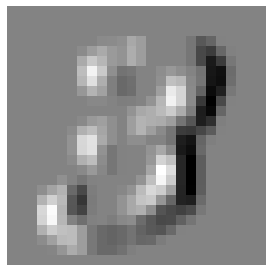

In [216]:
out = out_unf.view(26,26)
show_image(out);

In [217]:
%timeit -n 1 torch.tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng]);

19.6 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [218]:
%timeit -n 100 (w@F.unfold(inp, (3,3))[0]).view(26,26);

108 µs ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Y como se puede ver en los resultados de tiempo este proceso es mucho más rapido que nuestra implementación _from scratch_ usando el `apply_kernel` que definimos arriba.

Pytorch ya tiene su implementación de las convolutions usando `F.conv2d`

In [221]:
%timeit -n 100 F.conv2d(inp, left_edge[None,None])

49.4 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [222]:
diag1_edge = torch.tensor([[ 0,-1, 1],
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()

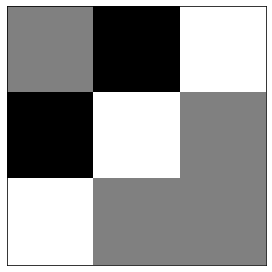

In [223]:
show_image(diag1_edge, noframe=False);

In [224]:
diag2_edge = torch.tensor([[ 1,-1, 0],
                     [ 0, 1,-1],
                     [ 0, 0, 1]]).float()

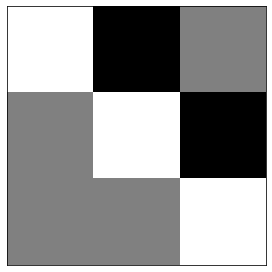

In [225]:
show_image(diag2_edge, noframe=False);

In [226]:
xb = x_imgs[:16][:,None]
xb.shape

torch.Size([16, 1, 28, 28])

In [227]:
edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge])[:,None]
edge_kernels.shape

torch.Size([4, 1, 3, 3])

In [228]:
batch_features = F.conv2d(xb, edge_kernels)
batch_features.shape

torch.Size([16, 4, 26, 26])

Esta salida lo que nos muestra es que tenemos 16 imágenes, 4 kernels, y mapas de bordes de 26x26 (empezamos con 28x28, pero perdimos un pixel a cada lado por lo discutido anteriormente). 

Podemos ver que se obtienen los mismos resultados que antes.


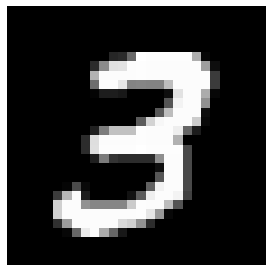

In [230]:
img0 = xb[7,0]
show_image(img0);

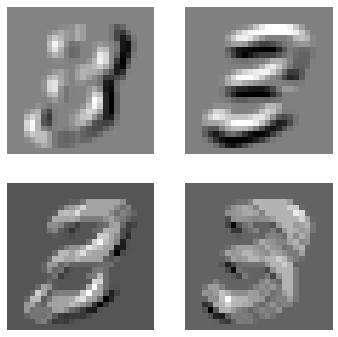

In [231]:
show_images([batch_features[7,i] for i in range(4)])

### _Strides_ y _Padding_

El _padding_ es el espaciado del kernel con respecto al input donde se aplicará, por ejemplo un _padding_ de 1 pixel.

<img alt="kernel" align="center" src = "images/PaddingKernel.png"/>

Cuando el padding se "sale" de la cuadricula se multiplica por valores que se pueden definir a conveniencia, pero es más común tomarlos como 0.

El padding se utiliza cuando se quiere mantener el tamaño original del input o aumentarlo, por ejemplo un input de 5x5, un kernel de 4x4 y 1 de _padding_:

<img alt="kernel" align="center" src = "images/PaddingAugment.png"/>

Si tenemos un kernel de tamaño `ks`x`ks`, el _padding_ necesario para mantener el tamaño es dado por `ks//2`. Algo a tener en cuenta es que es recomendado usar kernels de tamaño impar debido a que son más faciles de aplicar.

No hay necesidad de mover el kernel de uno enuno, se puede hacer de diferentes numeros y eso es llamado  _stride_, ejemplo un _stride-2 convolution_:

<img alt="kernel" align="center" src = "images/PaddingStride2.png"/>

las convoluciones con _stride_ de 2 y con un _padding_ de 1 son especialmente utiles en el procesamiento de imágenes, por ejemplo en los autoencoders y en clasificacion, debido a que reducen el tamaño del input en un factor de 2.

### Creando la CNN

Para empezar vamos a definir algunos parámetros:
- `n` y `m`: Son las dimensiones del set de entrenamiento.
- `c`: El número de categorías.
- `nh`: _Number of hidden_ es un tamaño intermedio por el que se va a pasar.

In [243]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50
n,m,c,nh

(50000, 784, tensor(10), 50)

Si se quisiera hacer un modelo lineal se haría de la siguiente forma:
1. Creamos un modelo secuencial con `nn.Sequential()` que a su vez contendrá la totalidad del modelo.
2. La primera capa será una capa lineal con `nn.Linear(m, nh)`.
   - `m`: En este caso es el valor inicial.
   - `nh`: Es el valor objetivo.
   En este caso queremos reducir el tamaño `m` a un tamaño `nh`.
3. Agregamos una capa de ReLU con `nn.ReLU`, esta se encarga de transformar los valores negativos de la capa aanterior en 0 y deja los valores postivos intactos.
4. Agregamos otra capa lineal, en este caso se pasa del valor `nh` a `10`.

In [245]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [246]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

Este sería el equivalente con una CNN.

In [248]:
broken_cnn = nn.Sequential(
    nn.Conv2d(1,30, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(30,10, kernel_size=3, padding=1)
)

Sin embargo, no podemos utilizarla directamente dado que no nos dará 10 posiblidades para cada imagen de nuestro _batch_, sino que tendremos 10 posibilidades, para cada 16 imágenes en el _batch_ para cada 28x28 pixel porque no tenemos ningún _stride_.

In [250]:
broken_cnn(xb).shape

torch.Size([16, 10, 28, 28])

Debido a que cona una CNN no se puede realizar una implementación tan simple vamos a definir una función con los siguientes parámetros para facilitarnos la vida: 

- `ni`: Numbero de inputs.
- `nf`: Number de _filtros_, es una manera de decir la cantidad de _channels_ que tendrá nuestra CNN, es como decir el numero de outputs.
- `ks`: Tamaño del kernel
- `stride`: El stride que queremos, en ese caso de 2.
- `act`: Un booleano para decidir si agregramos un ReLU.

Esta función lo que hará entonces es devolver una capa con una convolución sola o un pequeño modelo secuencial con una convolución y una ReLU al final.

In [252]:
def conv(ni, nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

Con la función lista, ya podemos crear nuestra CNN completa:
- Iniciamos con un input de 1 y salida de 4, las imágenes son de 28x28 con un _stride_ de 2, por lo que la salida de la primera capa será de 14x14.
- La siguiente capa tendrá de input la salida de la anterior y la salida será de 8, de nuevo un _stride_ 2 por lo que ahora internamente la imagen es de 7x7, así sucesivamente hasta que tengamos una "imagen" de 2x2.
- Luego una capa que pasará de 16 a 10, sin ReLU por lo que `act=False` que dejará la "imagen" en 1x1.
- Por último una capa de `nn.Flatten` para  quitar las dimensiones o ejes innecesarios.

In [254]:
simple_cnn = nn.Sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,16),           #2x2
    conv(16,10, act=False), #1x1
    nn.Flatten(),
)

Ahora cuando usemos este modelo vamos a obtener 10 posibilidades para cada imagen en nuestro _batch_ de 16 en vez del caos que teníamos antes.

In [256]:
simple_cnn(xb).shape, broken_cnn(xb).shape

(torch.Size([16, 10]), torch.Size([16, 10, 28, 28]))

Además podemos ver que el número de parámetros con respecto al modelo lineal es considerablemente menor, por lo que es más rapido usar la CNN.

In [258]:
tensor([o.numel() for o in model.parameters()]).sum()

tensor(39760)

In [259]:
tensor([o.numel() for o in simple_cnn.parameters()]).sum()

tensor(5274)

Ahora podemos entrenar esta CNN que acabamos de crear

In [261]:
x_imgs = x_train.view(-1,1,28,28)
xv_imgs = x_valid.view(-1,1,28,28)
train_ds,valid_ds = Dataset(x_imgs, y_train),Dataset(xv_imgs, y_valid)

In [262]:
from torch import optim

bs = 256
lr = 0.4
train_dl,valid_dl = get_dls(train_ds, valid_ds, bs, collate_fn=collate_device)
opt = optim.SGD(simple_cnn.parameters(), lr=lr)

In [263]:
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.32061372947692873 0.9024999994277955
1 0.26145002307891846 0.9219999997138977
2 0.1420852315425873 0.9564000007629394
3 0.10846944243907929 0.969900000667572
4 0.16442704036235808 0.9525000003814698


Y podemos refinar el entrenamiento cambiando el _learning rate_

In [265]:
opt = optim.SGD(simple_cnn.parameters(), lr=lr/4)
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.08445898110866547 0.974999999332428
1 0.08205007770061493 0.9768000007629395
2 0.08130012106895447 0.9766000008583069
3 0.08311226656436921 0.9767000007629395
4 0.08207321691513061 0.9763999993324279


### Datos Adicionales

Si tenemos un input de la forma `64x1x28x28` los ejes o dimensiones toman el nombre de `batch, channel, height, width`, esto es comunmente representado como **NCHW** donde N corresponde al tamaño del batch, TensorFlow, otra de las grandes librerías para inteligencia artificial utiliza **NHWC** también conocido como "_Channel Last_", muchos modelos son más rápidos de esta forma y por ese motivo en los últimos años PyTorch paso a soportarlo.

En nuesta CNN podemos ver que la estructura de la primera capa tiene esa forma:

- 1 canal de entrada.
- 4 canales de salida.
- Kernel de 3x3.

In [268]:
simple_cnn

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): Flatten(start_dim=1, end_dim=-1)
)

In [269]:
simple_cnn[0][0]

Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

In [270]:
conv1 = simple_cnn[0][0]
conv1.weight.shape

torch.Size([4, 1, 3, 3])

Si quieres ver de forma más interactiva las multiplicaciones que hay en una CNN puedes abrir conv-example.xls del repositorio de la guía de laboratorio, ir a `Formulas > Ver Precedente` te mostrará de donde salió el resultado.

### Imágenes a Color

Las imágenes a color son solo un tensor de rango 3:

In [274]:
from torchvision.io import read_image
im = read_image('images/AIEmozione.jpg')
im.shape

torch.Size([3, 650, 1200])

<Axes: >

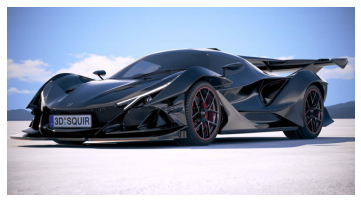

In [275]:
show_image(im.permute(1,2,0))

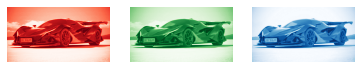

In [276]:
_,axis = plt.subplots(1,3)
for car, ax, color in zip(im, axis, ('Reds', 'Greens', 'Blues')): show_image(255-car, ax = ax, cmap=color)

Todos estos luego se suman para obtener la imagen.

<img alt="kernel" align="center" src = "images/Colors.svg"/>

## Entrenando la CNN

Ahora vamos a entrenar nuestra CNN para prepararla para el Autoencoder

In [281]:
learning_rate = 0.4

In [282]:
cnn = nn.Sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,16),           #2x2
    conv(16,10, act=False),#1x1
    nn.Flatten()).to(def_device)

In [283]:
opt = optim.SGD(cnn.parameters(), lr=learning_rate)
loss,acc = fit(5, cnn, F.cross_entropy, opt, dt, dv)

0 0.6838736822128296 0.7493
1 0.5286516395568848 0.808
2 0.4876855179786682 0.8256
3 0.4338136445045471 0.8433
4 0.41072925148010253 0.8507


In [284]:
dsd['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

## Autoencoder

Un Autoencoder es basicamente un algoritmo de compresión, es una CNN que primero comprime los datos y luego los intenta recrear, inicialmente puede parecer que no tiene utilidad porque en principio no se está haciendo nada con la imagen, pero precisamente por su naturaleza de compresor es extremadamente útil para procesos más avanzados, en este caso de generación de imágenes, debido a que es computacionalmente más barato usar imágenes "comprimidas" en medio del proceso de entrenamiento.

Por este motivo el autoencoder es uno de los 3 componentes más importantes de **Stable Diffusion**, siendo los otros dos **CLIP** y la **U-Net**.

<img alt="kernel" align="center" src = "images/SDArquitectura.png"/>

En esta parte se creará una `deconvolutional function`, que hará lo contrario de la convolución que defínimos antes:
- La primera capa es una `nn.UpsamplingNearest2d` que lo que hace es copiar los pixeles de la capa anterior y duplicarlos.
- La segunda capa será una `nn.Conv2d` con un _stride_ de 1, lo que a efectos practicos duplica el tamaño de la cuadricula de la capa anterior.
- Por último la activación de la ReLU.

In [289]:
def deconv(ni, nf, ks=3, act=True):
    layers = [nn.UpsamplingNearest2d(scale_factor=2),
              nn.Conv2d(ni, nf, stride=1, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    return nn.Sequential(*layers)

Aquí se define dos funciones para el `fit` que se tenía antes 

In [291]:
def eval(model, loss_func, valid_dl, epoch=0):
    model.eval()
    with torch.no_grad():
        tot_loss,count = 0.,0
        for xb,_ in valid_dl:
            pred = model(xb)
            n = len(xb)
            count += n
            tot_loss += loss_func(pred,xb).item()*n
    print(epoch, f'{tot_loss/count:.3f}')

La diferencia es que ahora en la parte de `Loss` no se está calculando un loss con respecto a un validation set, sino que se está comparando consigo mismo (no hay `yb` sino `xb`), porque necesitamos entrenarlo para que recree lo que le entro, así funciona un autoencoder.

In [293]:
def fit_autoencoder(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,_ in train_dl:
            loss = loss_func(model(xb), xb)
            loss.backward()
            opt.step()
            opt.zero_grad()
        eval(model, loss_func, valid_dl, epoch)

Y Aquí definimos nuestro Autoencoder
- `nn.ZeroPad2d` agrega o quita un _padding_ a la imagen.
- `nn.Sigmoid` hace que todos los valores estén dentro de 0 y 1

In [295]:
autoencoder = nn.Sequential(   #28x28
    nn.ZeroPad2d(2),  #32x32
    conv(1,2),        #16x16
    conv(2,4),        #8x8
#     conv(4,8),        #4x4
#     deconv(8,4),      #8x8
    deconv(4,2),      #16x16
    deconv(2,1, act=False), #32x32
    nn.ZeroPad2d(-2), #28x28
    nn.Sigmoid()
).to(def_device)

Puedes probar a quitar el comentario de las capas más internas, pero eso empeora los resultados.

In [297]:
eval(autoencoder, F.mse_loss, dv)

0 0.174


In [298]:
opt = optim.AdamW(autoencoder.parameters(), lr=0.01)
fit_autoencoder(5, autoencoder, F.mse_loss, opt, dt, dv)

0 0.016
1 0.013
2 0.012
3 0.012
4 0.012


In [299]:
opt = optim.SGD(autoencoder.parameters(), lr=0.1)
fit_autoencoder(5, autoencoder, F.mse_loss, opt, dt, dv)

0 0.012
1 0.012
2 0.012
3 0.012
4 0.012


Y aquí obtenemos las imágenes que generó nuestro Autoencoder

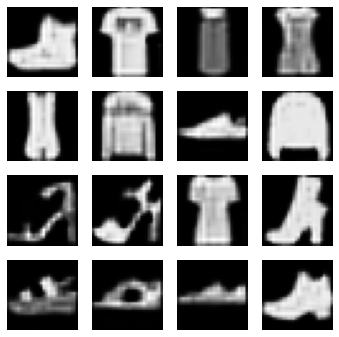

In [301]:
p = autoencoder(x_batch)
show_images(p[:16].data.cpu(), imsize=1.5)

Comparadas a las originales no están muy alejadas a pesar de ser un autoencoder extremadamente simple y sin optimizaciones.

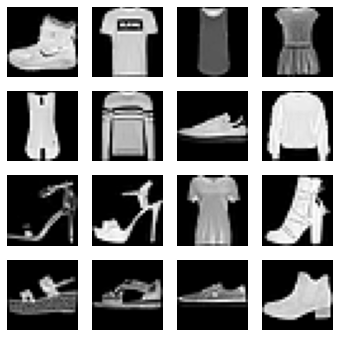

In [302]:
show_images(x_batch[:16].data.cpu(), imsize=1.5)

El propósito de esta última celda es solo para poder realizar el `Run All Above Selected`.